# Imports

In [145]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import common.common_pandas_lib as common

# Configuraciones

### Configuraciones librerias

In [146]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
sns.set_palette(common.COLORES_BARRAS)
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

# Carga optimizada del set de datos

In [147]:
zona_prop = common.cargar_train_optimizado('train.csv')

# Analisis de garage

In [148]:
cant_garages_nan = zona_prop['garages'].isnull().sum()
cant_garages_nan

37765

In [149]:
cant_garages_no_nan = (~zona_prop['garages'].isnull()).sum()
cant_garages_no_nan

202235

In [150]:
cant_propiedades = zona_prop.shape[0]
cant_propiedades

240000

## ¿Cuantas propiedades tienen NaN en garage?

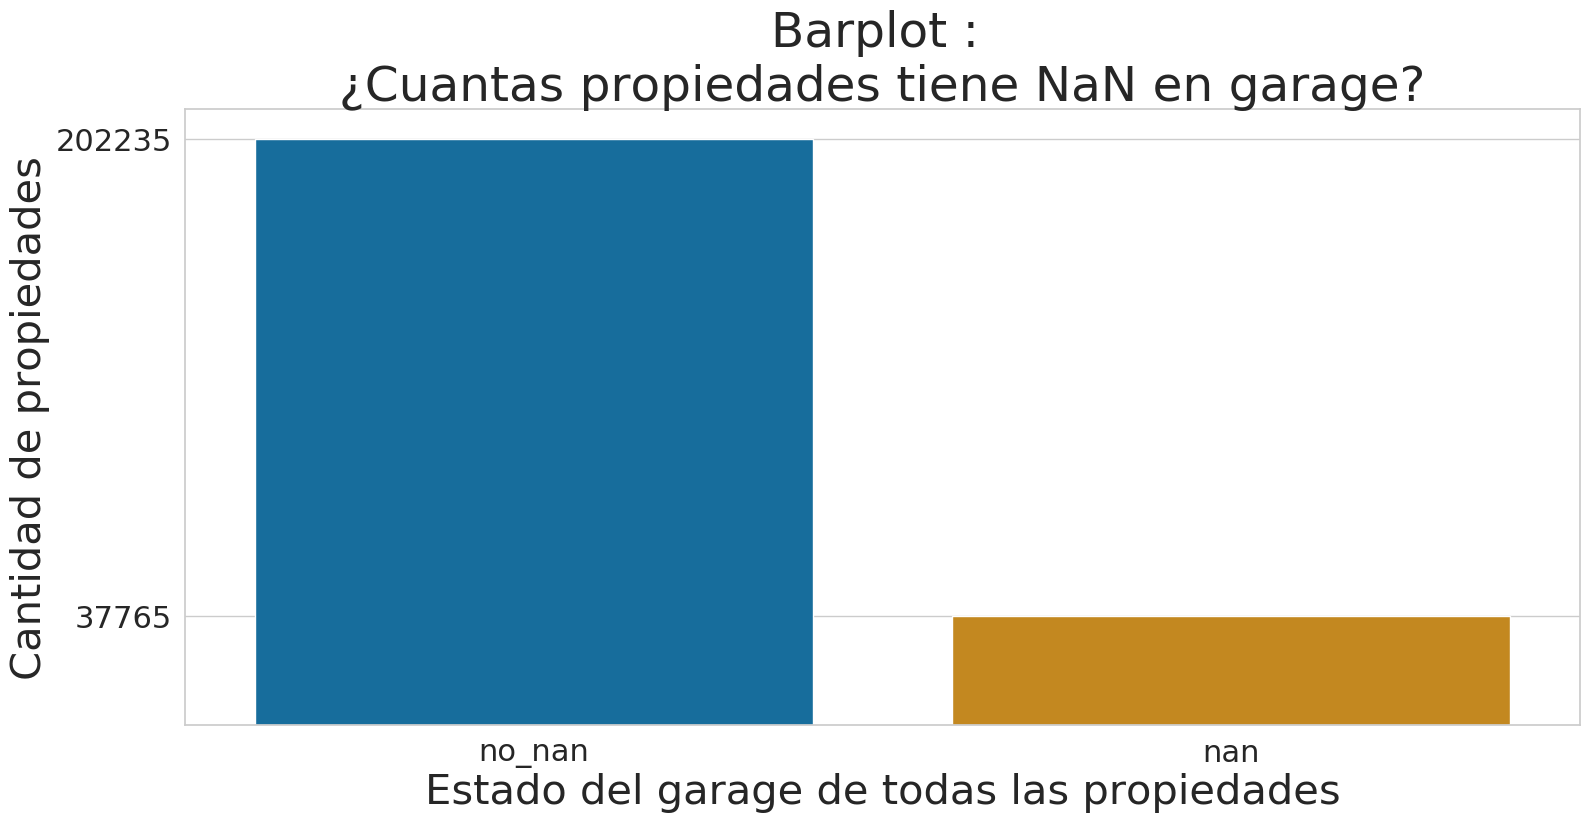

In [151]:
df_cant_garages_nan = pd.DataFrame(
    {'estado_garage' : ['no_nan', 'nan'], 
     'cantidad' : [
         cant_garages_no_nan, 
         cant_garages_nan
     ]}
    )
plot_bar_cant_garage_nan = sns.barplot(
                                x = 'estado_garage',
                                y = 'cantidad',
                                data = df_cant_garages_nan
                            )

# Titulos
common.setear_titulos_plot(
    plot_bar_cant_garage_nan,
    'Barplot : \n¿Cuantas propiedades tiene NaN en garage?',
    'Estado del garage de todas las propiedades',
    'Cantidad de propiedades'
)

# Y Ticks
plot_bar_cant_garage_nan.set_yticks(df_cant_garages_nan['cantidad'].get_values())

plt.show()

Descartamos las propiedades con NaN en Garage para el analisis

In [152]:
zona_garages = zona_prop.dropna(subset = ['garages'])
zona_garages['garages'].isnull().sum()

0

## ¿Cuantos garages hay por propiedad?

In [153]:
zona_garages['garages'].value_counts()

2.00    94167
1.00    59464
0.00    26926
3.00    21678
Name: garages, dtype: int64

In [154]:
df_frecuencia_garages = zona_garages['garages'].value_counts().to_frame()
df_frecuencia_garages.reset_index(inplace = True)
df_frecuencia_garages.rename(columns = {'index' : 'cantidad', 'garages': 'frecuencia'}, inplace = True)
df_frecuencia_garages.sort_values(by = 'cantidad', inplace = True)
df_frecuencia_garages

,cantidad,frecuencia
2,0.00,26926
1,1.00,59464
0,2.00,94167
3,3.00,21678


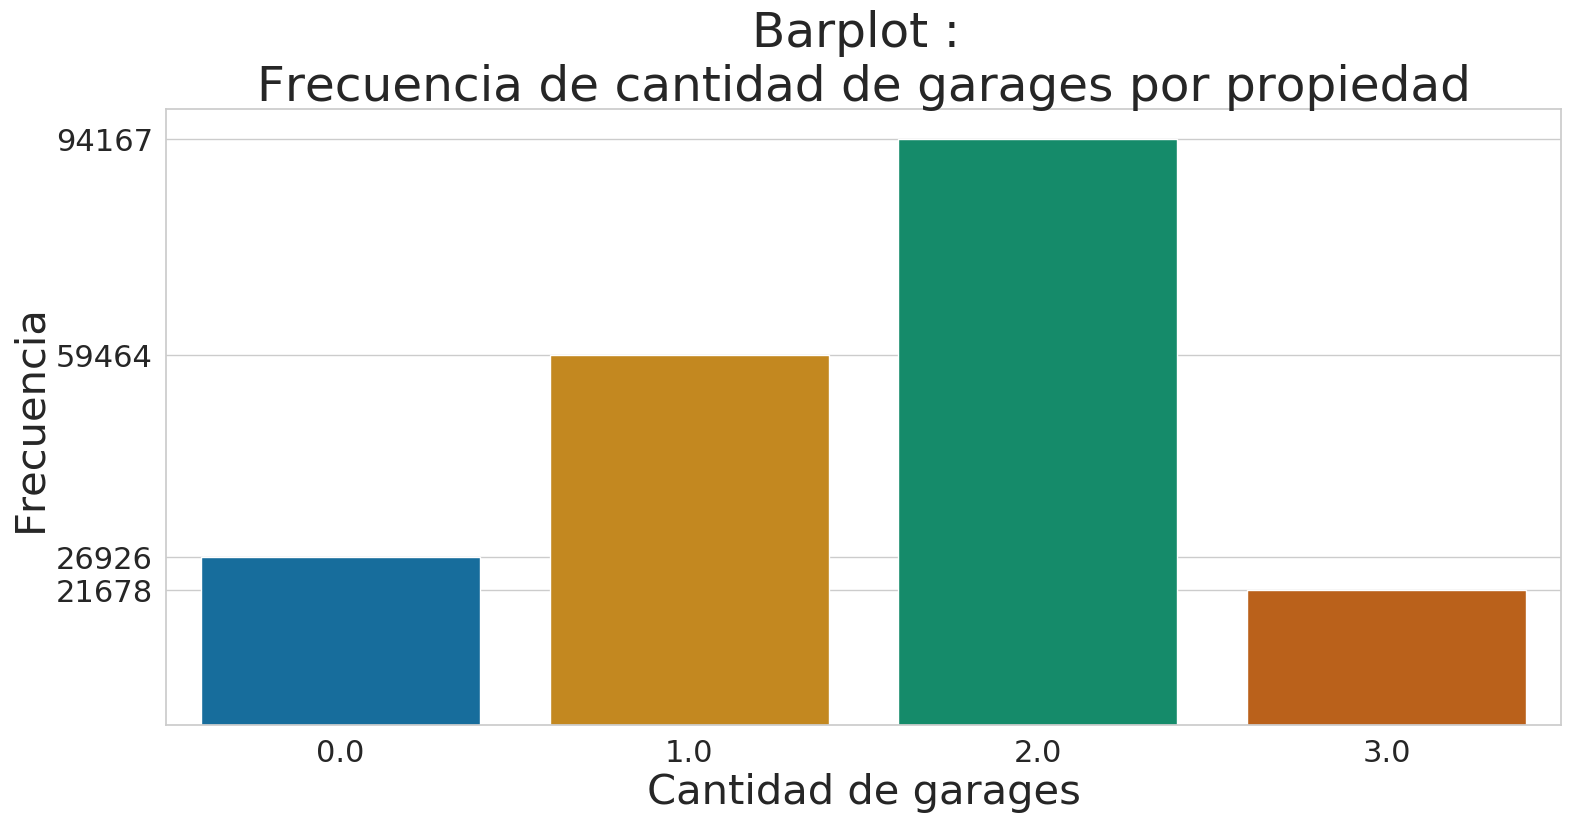

In [155]:
plot_bar_frecuencia_garages = sns.barplot(
                                x = 'cantidad',
                                y = 'frecuencia',
                                data = df_frecuencia_garages
                            )
common.setear_titulos_plot(
    plot_bar_frecuencia_garages,
    'Barplot : \nFrecuencia de cantidad de garages por propiedad',
    'Cantidad de garages',
    'Frecuencia'
)
plot_bar_frecuencia_garages.set_yticks(df_frecuencia_garages['frecuencia'].get_values())
plt.show()

## Garages-Banos

### ¿Cuantos datos perdemos si descartamos todos garages en NaN y garages con banos en NaN?

In [156]:
cant_garages_no_nan_y_banos_nan = zona_garages['banos'].isnull().sum()
cant_garages_no_nan_y_banos_nan

18368

In [157]:
cant_garages_nan

37765

In [158]:
(cant_garages_nan + cant_garages_no_nan_y_banos_nan) / zona_prop.shape[0]

0.2338875

Se termina descartando el 20 % de los datos

In [159]:
zona_garages_banos = zona_garages.dropna(subset = ['banos'])
zona_garages_banos['banos'].isnull().sum()

0

### ¿Cuantas propiedades, en Mexico, hay para cada combinacion de garages y banos?

In [160]:
garages_banos_agrupados = zona_garages_banos.groupby(['garages','banos']).agg({'garages' : 'count'})
garages_banos_agrupados.columns = ['cantidad']
garages_banos_agrupados = garages_banos_agrupados.reset_index()
garages_banos_pivot_cantidad = garages_banos_agrupados.pivot_table(index = 'garages', columns = 'banos', values = 'cantidad')
garages_banos_pivot_cantidad

banos,1.0,2.0,3.0,4.0
garages,,,,
0.00,7176,4154,1975,881
1.00,33272,20520,3973,782
2.00,11417,47079,25013,7706
3.00,1135,5943,8901,3940


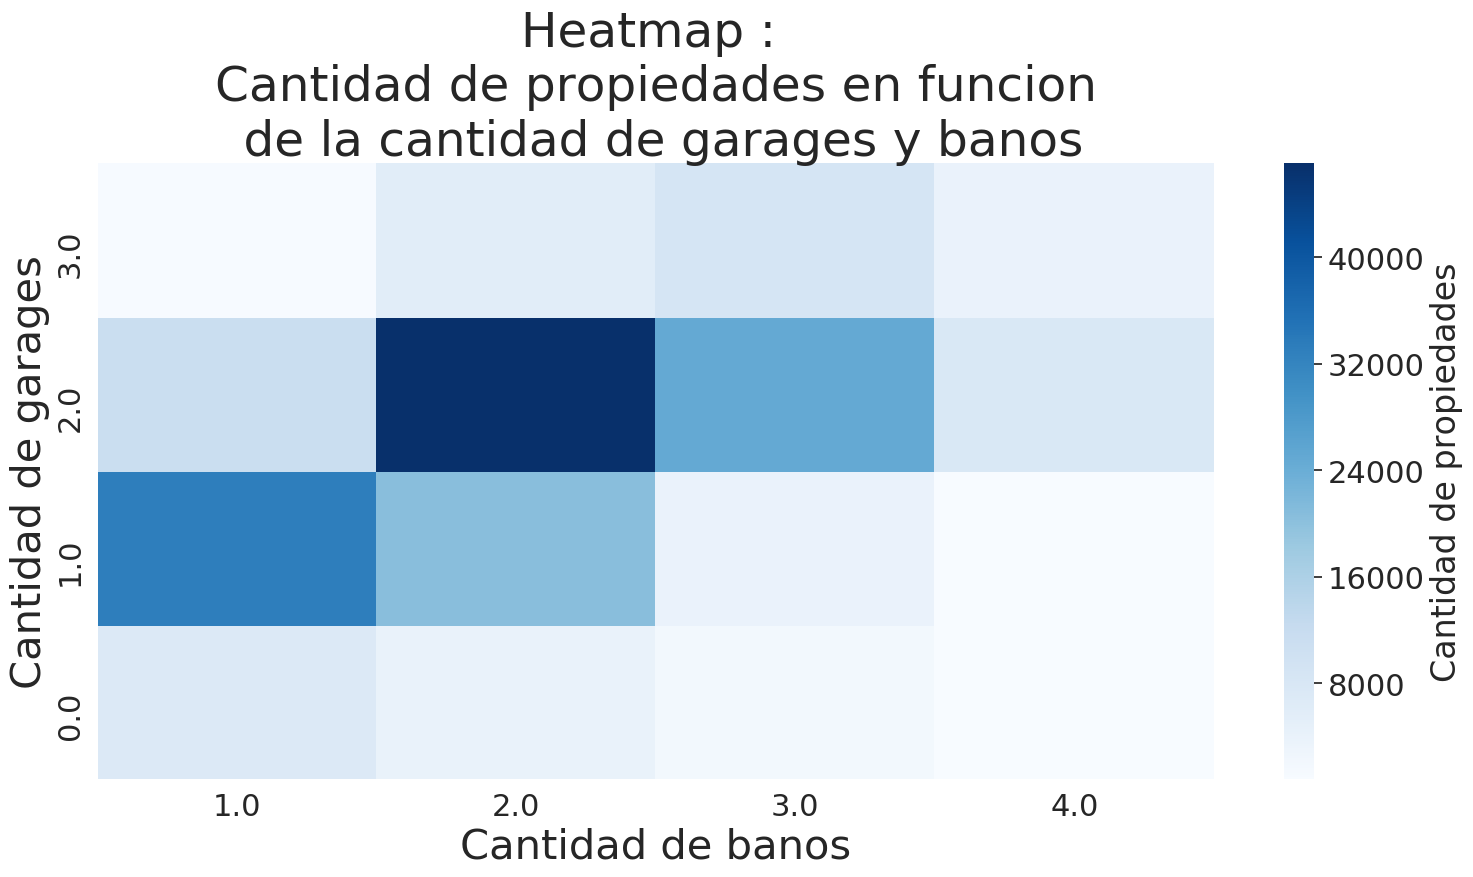

In [161]:
plot_heatmap_garages_banos_cant = sns.heatmap(
                                    garages_banos_pivot_cantidad, 
                                    cmap = 'Blues',
                                    cbar_kws = {'label' : 'Cantidad de propiedades'}
                                )
plot_heatmap_garages_banos_cant.invert_yaxis()

common.setear_titulos_plot(
    plot_heatmap_garages_banos_cant,
    'Heatmap : \nCantidad de propiedades en funcion\n de la cantidad de garages y banos',
    'Cantidad de banos',
    'Cantidad de garages'
)
plt.show()

Se observa una gran cantidad de propiedades con 2 garages y 2 banos.  
En segundo lugar le siguen las propiedades con 1 garage y 1 bano.  

## Garages-Metroscubiertos

### ¿Cuantos datos perdermos si descartamos todos los garages NaN y los garages con metroscubiertos NaN?

In [162]:
cant_garages_nan

37765

In [163]:
cant_garages_no_nan_y_metroscubiertos_nan = zona_garages['metroscubiertos'].isnull().sum()
cant_garages_no_nan_y_metroscubiertos_nan

11518

In [164]:
(cant_garages_nan + cant_garages_no_nan_y_metroscubiertos_nan) / zona_prop.shape[0]

0.20534583333333334

Perdemos un 20 % de los datos

In [165]:
zona_garages_metroscubiertos = zona_garages.dropna(subset = ['metroscubiertos'])
zona_garages_metroscubiertos['metroscubiertos'].isnull().sum()

0

### ¿Como se distribuye los metroscubiertos segun la cantidad de garages por propiedad?

In [166]:
garages_agrupados_metroscubiertos_estadisticas = zona_garages_metroscubiertos.groupby(['garages']).agg({'metroscubiertos' : [common.cuantil_1, 'median', common.cuantil_3]})
garages_agrupados_metroscubiertos_estadisticas.columns = garages_agrupados_metroscubiertos_estadisticas.columns.get_level_values(0) \
                                                            + '_' + \
                                                            garages_agrupados_metroscubiertos_estadisticas.columns.get_level_values(1)
garages_agrupados_metroscubiertos_estadisticas

,metroscubiertos_cuantil_1,metroscubiertos_median,metroscubiertos_cuantil_3
garages,,,
0.00,72.00,134.00,231.00
1.00,64.00,83.00,122.00
2.00,120.00,167.00,232.00
3.00,195.00,255.00,320.00


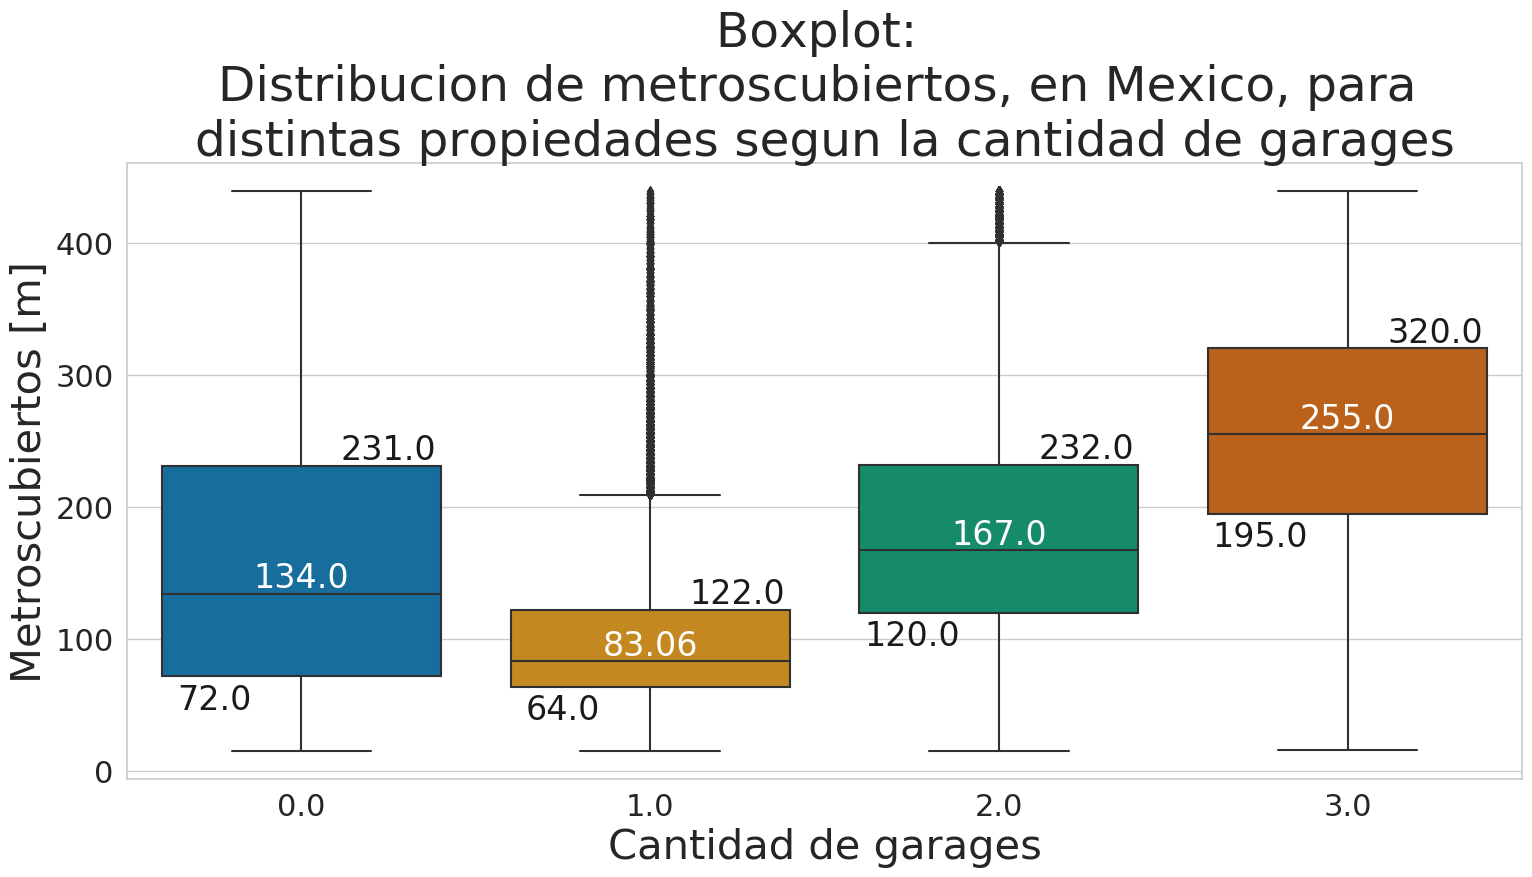

In [167]:
plot_boxplot_metroscubiertos_garages = sns.boxplot(
                                            x = 'garages',
                                            y = 'metroscubiertos',
                                            data = zona_garages_metroscubiertos
                                        )
# Titulos
common.setear_titulos_plot(
    plot_boxplot_metroscubiertos_garages,
    'Boxplot: \nDistribucion de metroscubiertos, en Mexico, para \ndistintas propiedades segun la cantidad de garages',
    'Cantidad de garages',
    'Metroscubiertos [m]'
)

# Cuantiles y Medianas
common.agregar_serie_plot(
    plot_boxplot_metroscubiertos_garages,
    garages_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_1'],
    garages_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_1'],
    'k',
    -0.25, -25
)

common.agregar_serie_plot(
    plot_boxplot_metroscubiertos_garages,
    garages_agrupados_metroscubiertos_estadisticas['metroscubiertos_median'],
    garages_agrupados_metroscubiertos_estadisticas['metroscubiertos_median'],
    'w',
    0, 5
)

common.agregar_serie_plot(
    plot_boxplot_metroscubiertos_garages,
    garages_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_3'],
    garages_agrupados_metroscubiertos_estadisticas['metroscubiertos_cuantil_3'],
    'k',
    0.25, 5
)
plt.show()

## Garages-Metrostotales

### ¿Cuantos datos perdemos si descartamos todos los garages NaN y los garages con metrostotales NaN?

In [168]:
cant_garages_nan

37765

In [169]:
cant_garages_no_nan_metrostotales_nan = zona_garages['metrostotales'].isnull().sum()
cant_garages_no_nan_metrostotales_nan

41377

In [170]:
(cant_garages_nan + cant_garages_no_nan_metrostotales_nan) / zona_prop.shape[0]

0.3297583333333333

Perdemos el 33 % de los datos

In [171]:
zona_garages_metrostotales = zona_garages.dropna(subset = ['metrostotales'])
zona_garages_metrostotales['metrostotales'].isnull().sum()

0

### ¿Como se distribuyen los metrostotales segun la cantidad de garages por propiedad?

In [172]:
garages_agrupados_metrostotales_estadisticas = zona_garages_metrostotales.groupby(['garages']).agg({'metrostotales' : [common.cuantil_1,'median', common.cuantil_3]})
garages_agrupados_metrostotales_estadisticas

metrostotales                                          
                   cuantil_1               median            cuantil_3
garages                                                               
0.00                  105.00               178.00               274.00
1.00                   69.00                90.00               128.00
2.00                  120.00               160.00               220.00
3.00                  180.00               240.00               300.00

In [173]:
garages_agrupados_metrostotales_estadisticas.columns = garages_agrupados_metrostotales_estadisticas.columns.get_level_values(0) \
                                                        + '_' + \
                                                        garages_agrupados_metrostotales_estadisticas.columns.get_level_values(1)
garages_agrupados_metrostotales_estadisticas

,metrostotales_cuantil_1,metrostotales_median,metrostotales_cuantil_3
garages,,,
0.00,105.00,178.00,274.00
1.00,69.00,90.00,128.00
2.00,120.00,160.00,220.00
3.00,180.00,240.00,300.00


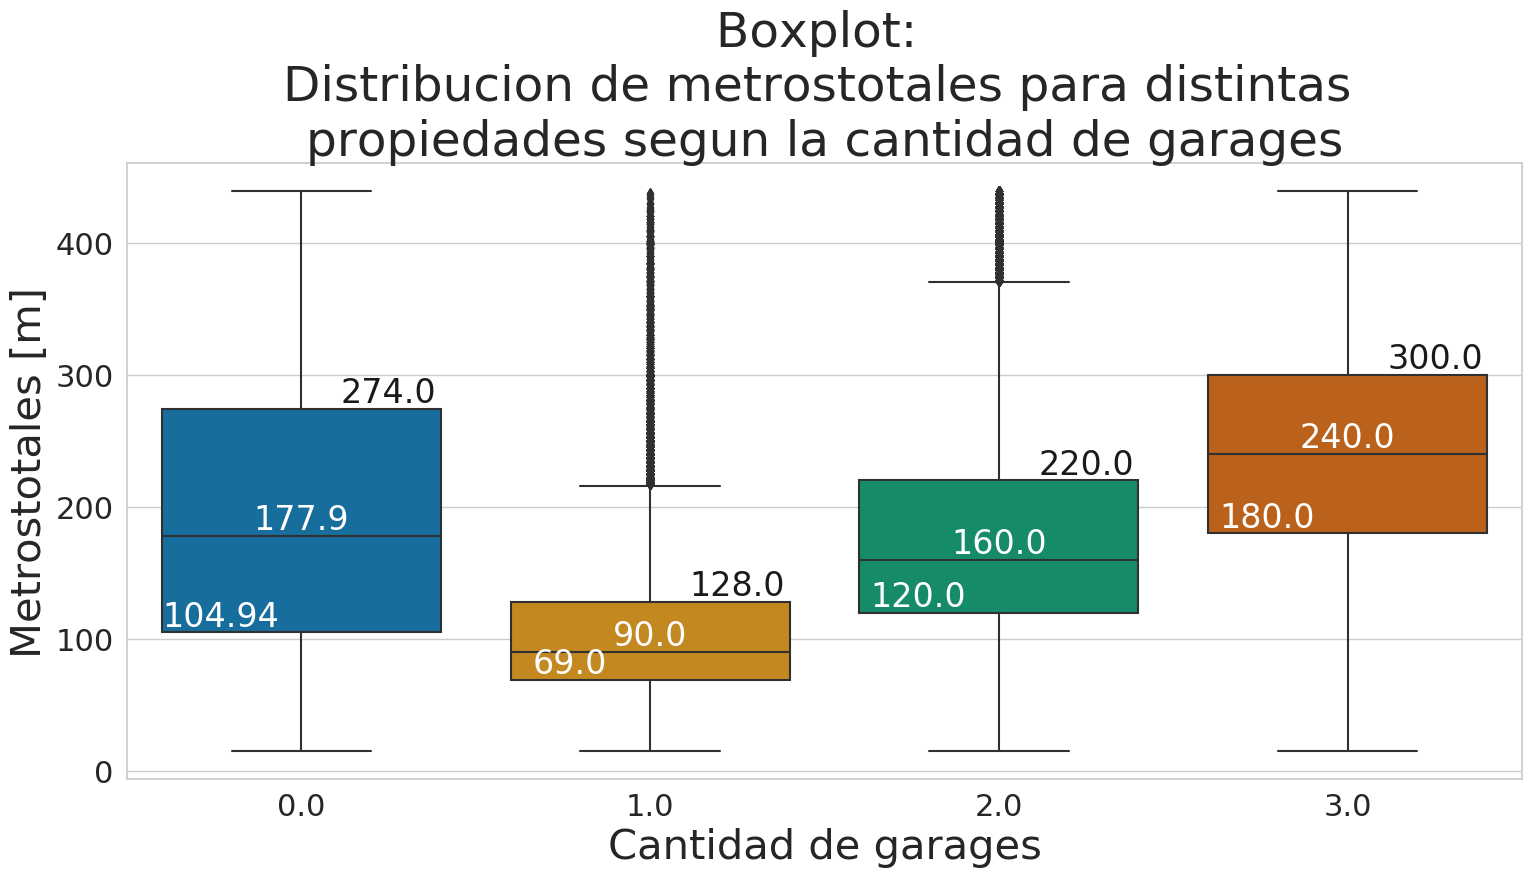

In [174]:
plot_boxplot_metrostotales_garages = sns.boxplot(
                                            x = 'garages',
                                            y = 'metrostotales',
                                            data = zona_garages_metrostotales
                                        )
# Titulos
common.setear_titulos_plot(
    plot_boxplot_metrostotales_garages,
    'Boxplot: \nDistribucion de metrostotales para distintas \npropiedades segun la cantidad de garages',
    'Cantidad de garages',
    'Metrostotales [m]'
)

# Cuantiles y Medianas
common.agregar_serie_plot(
    plot_boxplot_metrostotales_garages, 
    garages_agrupados_metrostotales_estadisticas['metrostotales_cuantil_1'],
    garages_agrupados_metrostotales_estadisticas['metrostotales_cuantil_1'],
    'w',
    -0.23, 5
)

common.agregar_serie_plot(
    plot_boxplot_metrostotales_garages, 
    garages_agrupados_metrostotales_estadisticas['metrostotales_median'],
    garages_agrupados_metrostotales_estadisticas['metrostotales_median'],
    'w',
    0, 5
)

common.agregar_serie_plot(
    plot_boxplot_metrostotales_garages, 
    garages_agrupados_metrostotales_estadisticas['metrostotales_cuantil_3'],
    garages_agrupados_metrostotales_estadisticas['metrostotales_cuantil_3'],
    'k',
    0.25, 5
)
plt.show()

## Garages-Metroscubiertos vs Garages-Metrostotales

### ¿Cuantos datos perdemos si descartamos garages nan, garages con metroscubiertos nan y garages con metroscubiertos y metrostolaes nan?

In [175]:
cant_garages_nan

37765

In [176]:
cant_garages_no_nan_y_metroscubiertos_nan

11518

In [177]:
(cant_garages_nan + cant_garages_no_nan_y_metroscubiertos_nan + zona_garages_metroscubiertos['metrostotales'].isnull().sum()) / zona_prop.shape[0]

0.37775

Perdemos el 38 % de los datos

In [178]:
zona_garages_metros = zona_garages_metroscubiertos.dropna(subset = ['metrostotales'])
zona_garages_metros['metrostotales'].isnull().sum()

0

### ¿Que podemos visualizar en la comparacion de los metros cubiertos y totales de cada propiedad, en Mexico, segun la cantidad de garages?

In [179]:
garages_agrupados_metros_estadisticas =  zona_garages_metros.groupby(['garages']).agg({'metroscubiertos' : [common.cuantil_1, 'median', common.cuantil_3], 'metrostotales' : [common.cuantil_1, 'median', common.cuantil_3]})
garages_agrupados_metros_estadisticas

metroscubiertos                                            \
                   cuantil_1               median            cuantil_3   
garages                                                                  
0.00                   80.00               144.00               231.00   
1.00                   65.00                86.00               130.00   
2.00                  120.00               170.00               232.00   
3.00                  190.00               250.00               313.00   

               metrostotales                                            
                   cuantil_1               median            cuantil_3  
garages                                                                 
0.00                   89.00               140.00               219.00  
1.00                   68.00                90.00               127.00  
2.00                  120.00               160.00               216.00  
3.00                  175.00               235.00               300.00

In [180]:
garages_agrupados_metros_estadisticas.columns = garages_agrupados_metros_estadisticas.columns.get_level_values(0) + '_' + garages_agrupados_metros_estadisticas.columns.get_level_values(1)
garages_agrupados_metros_estadisticas = garages_agrupados_metros_estadisticas.reset_index()
garages_agrupados_metros_estadisticas

,garages,metroscubiertos_cuantil_1,metroscubiertos_median,metroscubiertos_cuantil_3,metrostotales_cuantil_1,metrostotales_median,metrostotales_cuantil_3
0,0.00,80.00,144.00,231.00,89.00,140.00,219.00
1,1.00,65.00,86.00,130.00,68.00,90.00,127.00
2,2.00,120.00,170.00,232.00,120.00,160.00,216.00
3,3.00,190.00,250.00,313.00,175.00,235.00,300.00


In [181]:
melt_garages_metros = pd.melt(zona_garages_metros, id_vars = 'garages', value_vars = ['metroscubiertos', 'metrostotales'])
melt_garages_metros.columns = ['garages', 'tipometros', 'valor']
melt_garages_metros

,garages,tipometros,valor
0,1.00,metroscubiertos,80.00
1,2.00,metroscubiertos,268.00
2,2.00,metroscubiertos,144.00
3,1.00,metroscubiertos,63.00
4,1.00,metroscubiertos,95.00
5,1.00,metroscubiertos,75.00
6,1.00,metroscubiertos,140.00
7,2.00,metroscubiertos,293.00
8,2.00,metroscubiertos,170.00
9,0.00,metroscubiertos,227.00


In [182]:
garages_agrupados_metros_estadisticas = melt_garages_metros.groupby(['garages', 'tipometros']).agg({'valor' : [common.cuantil_1, 'median', common.cuantil_3]})
garages_agrupados_metros_estadisticas = garages_agrupados_metros_estadisticas.unstack()
garages_agrupados_metros_estadisticas.columns = garages_agrupados_metros_estadisticas.columns.get_level_values(2) + '_' + garages_agrupados_metros_estadisticas.columns.get_level_values(1)
garages_agrupados_metros_estadisticas

,metroscubiertos_cuantil_1,metrostotales_cuantil_1,metroscubiertos_median,metrostotales_median,metroscubiertos_cuantil_3,metrostotales_cuantil_3
garages,,,,,,
0.00,80.00,89.00,144.00,140.00,231.00,219.00
1.00,65.00,68.00,86.00,90.00,130.00,127.00
2.00,120.00,120.00,170.00,160.00,232.00,216.00
3.00,190.00,175.00,250.00,235.00,313.00,300.00


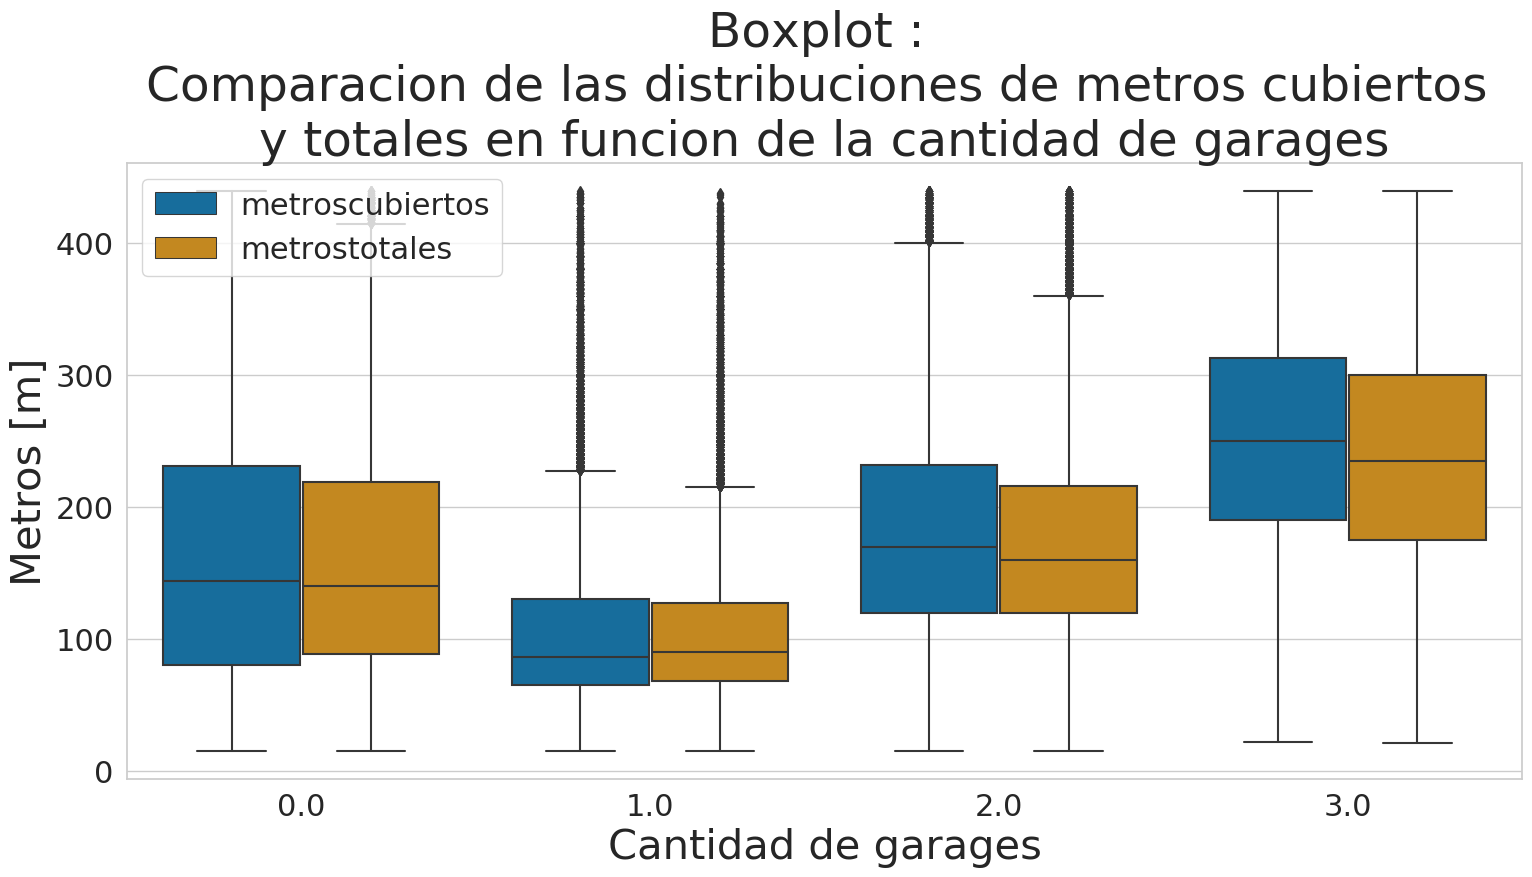

In [183]:
plot_boxplot_group_tipometros_garages = sns.boxplot(
                                            x = melt_garages_metros['garages'].get_values(),
                                            y = melt_garages_metros['valor'].get_values(),
                                            hue = 'tipometros',
                                            data = melt_garages_metros
                                        )

plot_boxplot_group_tipometros_garages.legend(loc = 'upper left')

common.setear_titulos_plot(
    plot_boxplot_group_tipometros_garages,
    'Boxplot : \nComparacion de las distribuciones de metros cubiertos \ny totales en funcion de la cantidad de garages',
    'Cantidad de garages',
    'Metros [m]'
    
)

plt.show()

## Garages-Fecha

### ¿Cuantos datos perdemos si descartamos garages NaN y garages con fechas NaN?

In [184]:
cant_garages_nan

37765

In [185]:
zona_garages['fecha'].isnull().sum()

0

No tenemos fechas NaN.  
Pero, ¿ todas las fechas tienen sentido en el contexto del data set ?

In [186]:
zona_garages['fecha'].dt.year.unique()

array([2015, 2013, 2012, 2016, 2014])

Ningun año parece fuera de contexto, dado que son cada uno seguido de otro.  
Concluimos que las fechas estan limpias (aunque no hayamos verificado, mes, dias, hora, minuto, segundo)

In [187]:
(cant_garages_nan + zona_garages['fecha'].isnull().sum()) / zona_prop.shape[0]

0.15735416666666666

No perdemos mas datos de los ya descartados por garages NaN.  

### ¿Como evoluciono la cantidad de garages por propiedad, en Mexico, con el tiempo?

In [188]:
zona_garages = zona_garages.copy()
zona_garages['anio'] = zona_garages['fecha'].dt.year

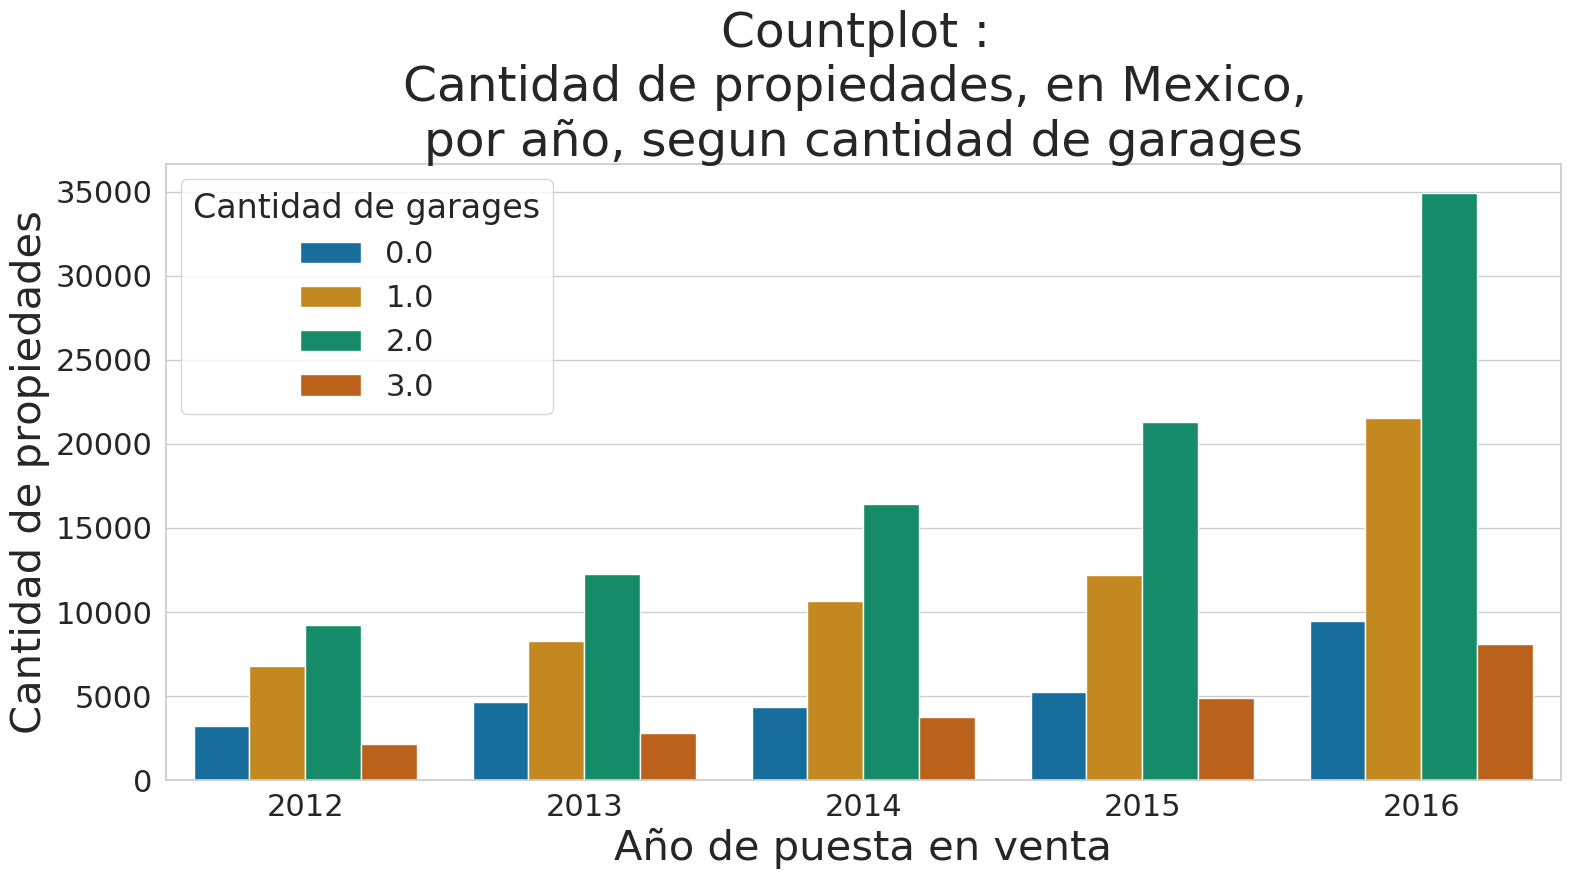

In [189]:
plot_countplot_garages_anio = sns.countplot(
                                x = 'anio',
                                hue  = 'garages',
                                data = zona_garages
                            )
# Titulos
common.setear_titulos_plot(
    plot_countplot_garages_anio,
    'Countplot : \nCantidad de propiedades, en Mexico, \npor año, segun cantidad de garages',
    'Año de puesta en venta',
    'Cantidad de propiedades'
)

# Leyenda
plot_countplot_garages_anio.legend(title = 'Cantidad de garages')

plt.show()

Desde 2012 hasta 2015 vemos un crecimiento lineal de las cantidades de propiedades en todo  en venta para todas las variaciones de cantidad de propiedades.  
Del 2015 a 2016, vemos que la cantidad de propiedades en venta se duplica en todas las categorias.  
En todos la años, siempre predomina las propiedades con 2 garages, seguidos de 1, 0 y 3.


## Garages-Gimnasio

### ¿Cuantos datos perdemos si descaramos todos la garages NaN y los garages con Gimnasio NaN?

In [190]:
cant_garages_nan

37765

In [191]:
zona_garages['gimnasio'].isnull().sum()

0

No perdemos mas datos, en este analisis

### ¿Cuantas propieades tienen gimnasio segun la cantidad de garages?

In [192]:
garages_agrupados_gimnasio_cantidad = zona_garages.groupby(['garages']).agg({'gimnasio' : 'value_counts'})
garages_agrupados_gimnasio_cantidad.columns = ['cantidad_propieades']
garages_agrupados_gimnasio_cantidad = garages_agrupados_gimnasio_cantidad.reset_index()
garages_agrupados_gimnasio_cantidad.columns = ['garages', 'tiene_gimnasio', 'cantidad_propieades']
garages_agrupados_gimnasio_cantidad

,garages,tiene_gimnasio,cantidad_propieades
0,0.00,False,26671
1,0.00,True,255
2,1.00,False,57478
3,1.00,True,1986
4,2.00,False,86698
5,2.00,True,7469
6,3.00,False,19578
7,3.00,True,2100


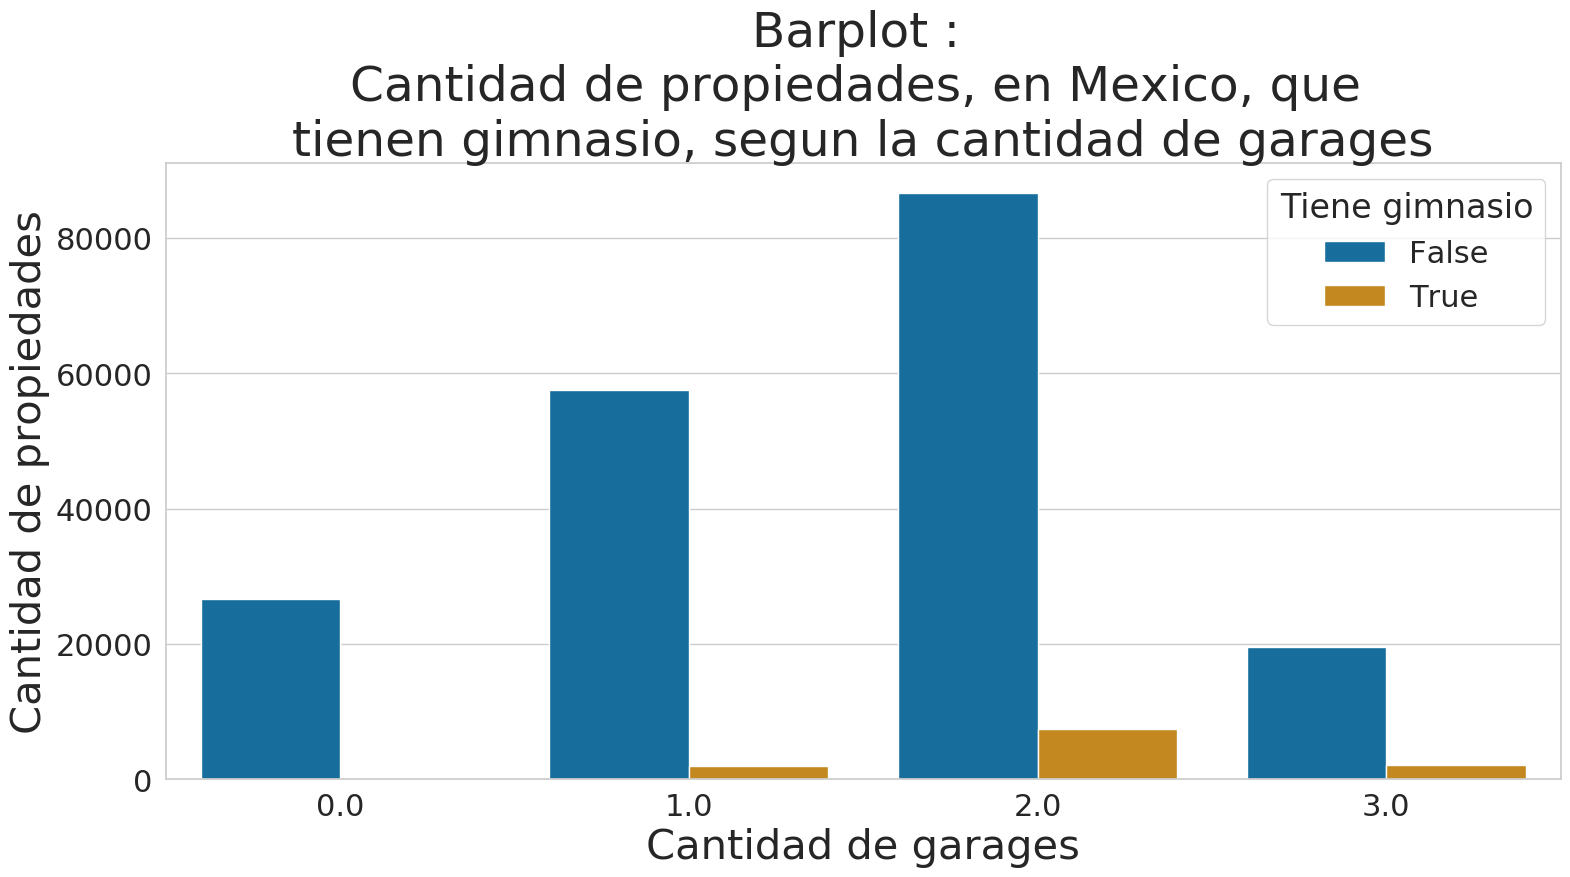

In [193]:
plot_countplot_garages_gimnasio = sns.barplot(
                                    x = 'garages', 
                                    hue = 'tiene_gimnasio',
                                    y = 'cantidad_propieades',
                                    data = garages_agrupados_gimnasio_cantidad
                                )
# Titulos
common.setear_titulos_plot(
    plot_countplot_garages_gimnasio,
    'Barplot : \nCantidad de propiedades, en Mexico, que \ntienen gimnasio, segun la cantidad de garages',
    'Cantidad de garages',
    'Cantidad de propiedades'
)

# Leyenda
plot_countplot_garages_gimnasio.legend(title = 'Tiene gimnasio')

plt.show()

Practicamenet hay pocas propiedades que tienen gimnasio, y eso parece no depender de la cantidad de garages.  
La cantidad de propiedades con gimnasio parece nula en para los que tienen garage, pero en realidad es un valor muy chico.

In [194]:
garages_agrupados_gimnasio_cantidad_zoom_sin_1_2 = garages_agrupados_gimnasio_cantidad.loc[(~(garages_agrupados_gimnasio_cantidad['garages'].isin([1,2])))]
garages_agrupados_gimnasio_cantidad_zoom_sin_1_2

,garages,tiene_gimnasio,cantidad_propieades
0,0.00,False,26671
1,0.00,True,255
6,3.00,False,19578
7,3.00,True,2100


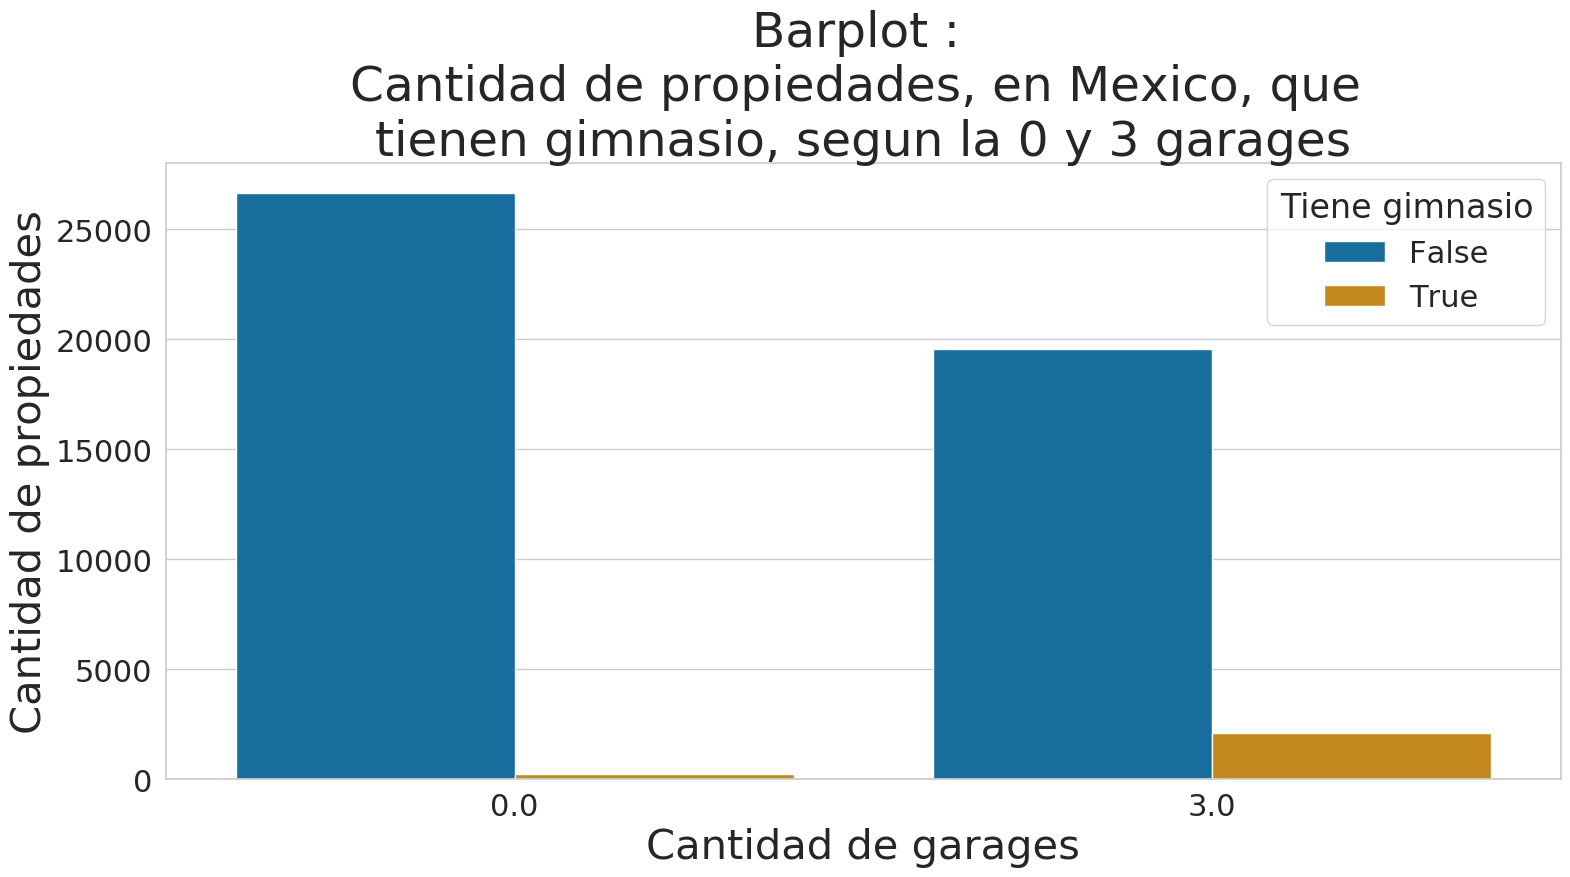

In [195]:
plot_countplot_garages_gimnasio = sns.barplot(
                                    x = 'garages', 
                                    hue = 'tiene_gimnasio',
                                    y = 'cantidad_propieades',
                                    data = garages_agrupados_gimnasio_cantidad_zoom_sin_1_2
                                )

# Titulos
common.setear_titulos_plot(
    plot_countplot_garages_gimnasio,
    'Barplot : \nCantidad de propiedades, en Mexico, que \ntienen gimnasio, segun la 0 y 3 garages',
    'Cantidad de garages',
    'Cantidad de propiedades'
)
# Leyenda
plot_countplot_garages_gimnasio.legend(title = 'Tiene gimnasio')

plt.show()

Aun con este zoom, la cantidad de propiedades con cero garages y gimansio es muy pequeña, comparado al grueso de todo Mexico.

## Garages-Usomultiples

### ¿Cuantos datos pierdo si descarto garages NaN y garages con usomultiples NaN?

In [196]:
zona_garages['usosmultiples'].isnull().sum()

0

usosmultiples esta limpio

### ¿Cuantas propiedades en Mexico hay por cantidad de garages, diferenciando entren los que tienen usosmultiples y no los tienen?

In [197]:
garages_agrupados_usosmultiples_cantidad = zona_garages.groupby(['garages']).agg({'usosmultiples' : 'value_counts'})
garages_agrupados_usosmultiples_cantidad.columns = ['cantidad_propieades']
garages_agrupados_usosmultiples_cantidad = garages_agrupados_usosmultiples_cantidad.reset_index()
garages_agrupados_usosmultiples_cantidad.columns = ['garages', 'tiene_usosmultiples', 'cantidad_propiedades']
garages_agrupados_usosmultiples_cantidad

,garages,tiene_usosmultiples,cantidad_propiedades
0,0.00,False,26677
1,0.00,True,249
2,1.00,False,57687
3,1.00,True,1777
4,2.00,False,86694
5,2.00,True,7473
6,3.00,False,19425
7,3.00,True,2253


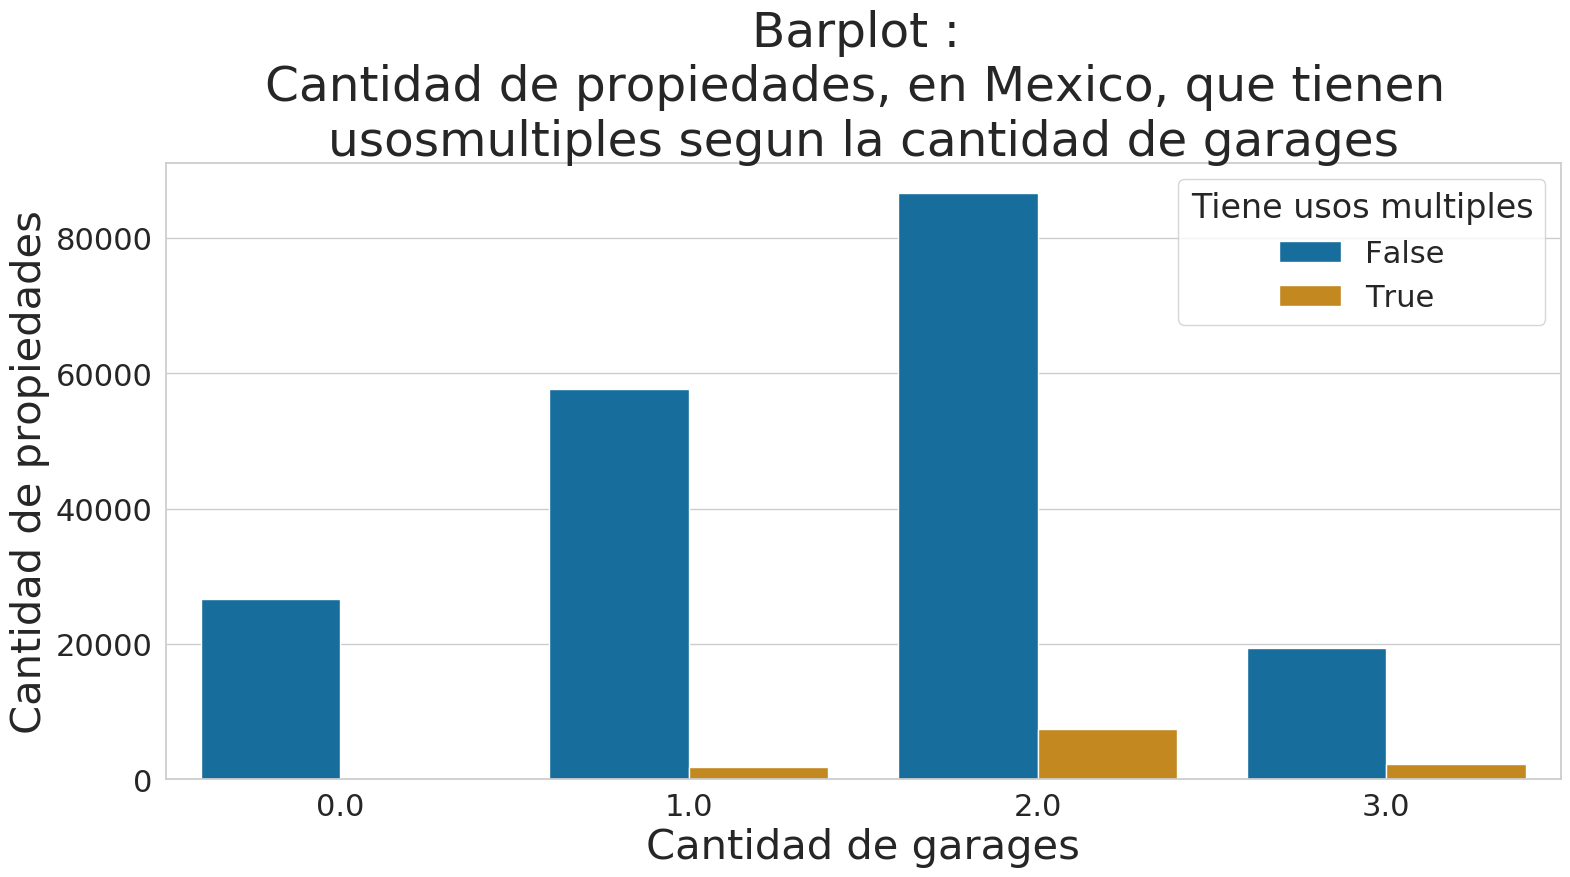

In [198]:
plot_barplot_garages_usosmultiples = sns.barplot(
                                        x = 'garages',
                                        y = 'cantidad_propiedades',
                                        hue = 'tiene_usosmultiples',
                                        data = garages_agrupados_usosmultiples_cantidad
                                    )
# Titulos
common.setear_titulos_plot(
    plot_barplot_garages_usosmultiples,
    'Barplot : \nCantidad de propiedades, en Mexico, que tienen \nusosmultiples segun la cantidad de garages',
    'Cantidad de garages',
    'Cantidad de propiedades'
)
# Leyenda
plot_barplot_garages_usosmultiples.legend(title = "Tiene usos multiples")

plt.show()

Tiene un forma muy parecida al barplot de garages-gimnasio.  
Al igual que en dicho grafico la cantidad de propiedades con 0 garages, y usosmultiples, parace nula, cuando en realidad es solo  y chica comparado a las cantidades con las que se trabaja.  
No se observa una relacion entre garages-gimnasio o garages-usosmultiples, pero tal vez si haya alguna para gimnasio-usosmultiples.  


## Garages-Piscina

### ¿Cuantos datos perdemos sin descartamos los garage NaN y los garages con piscina NaN?

In [199]:
zona_garages['piscina'].isnull().sum()

0

La columna piscina esta limpia; no se pierden datos.  

### ¿Cuantas propiedades, en Mexico, tienen piscina segun la cantidad de garages?

In [200]:
garages_agrupados_piscina_cantidad = zona_garages.groupby(['garages']).agg({'piscina': 'value_counts'})
garages_agrupados_piscina_cantidad.columns = ['cantidad_propiedades']
garages_agrupados_piscina_cantidad = garages_agrupados_piscina_cantidad.reset_index()
garages_agrupados_piscina_cantidad.columns = ['garages', 'tiene_piscina', 'cantidad_propiedades']
garages_agrupados_piscina_cantidad

,garages,tiene_piscina,cantidad_propiedades
0,0.00,False,25928
1,0.00,True,998
2,1.00,False,56437
3,1.00,True,3027
4,2.00,False,83001
5,2.00,True,11166
6,3.00,False,18999
7,3.00,True,2679


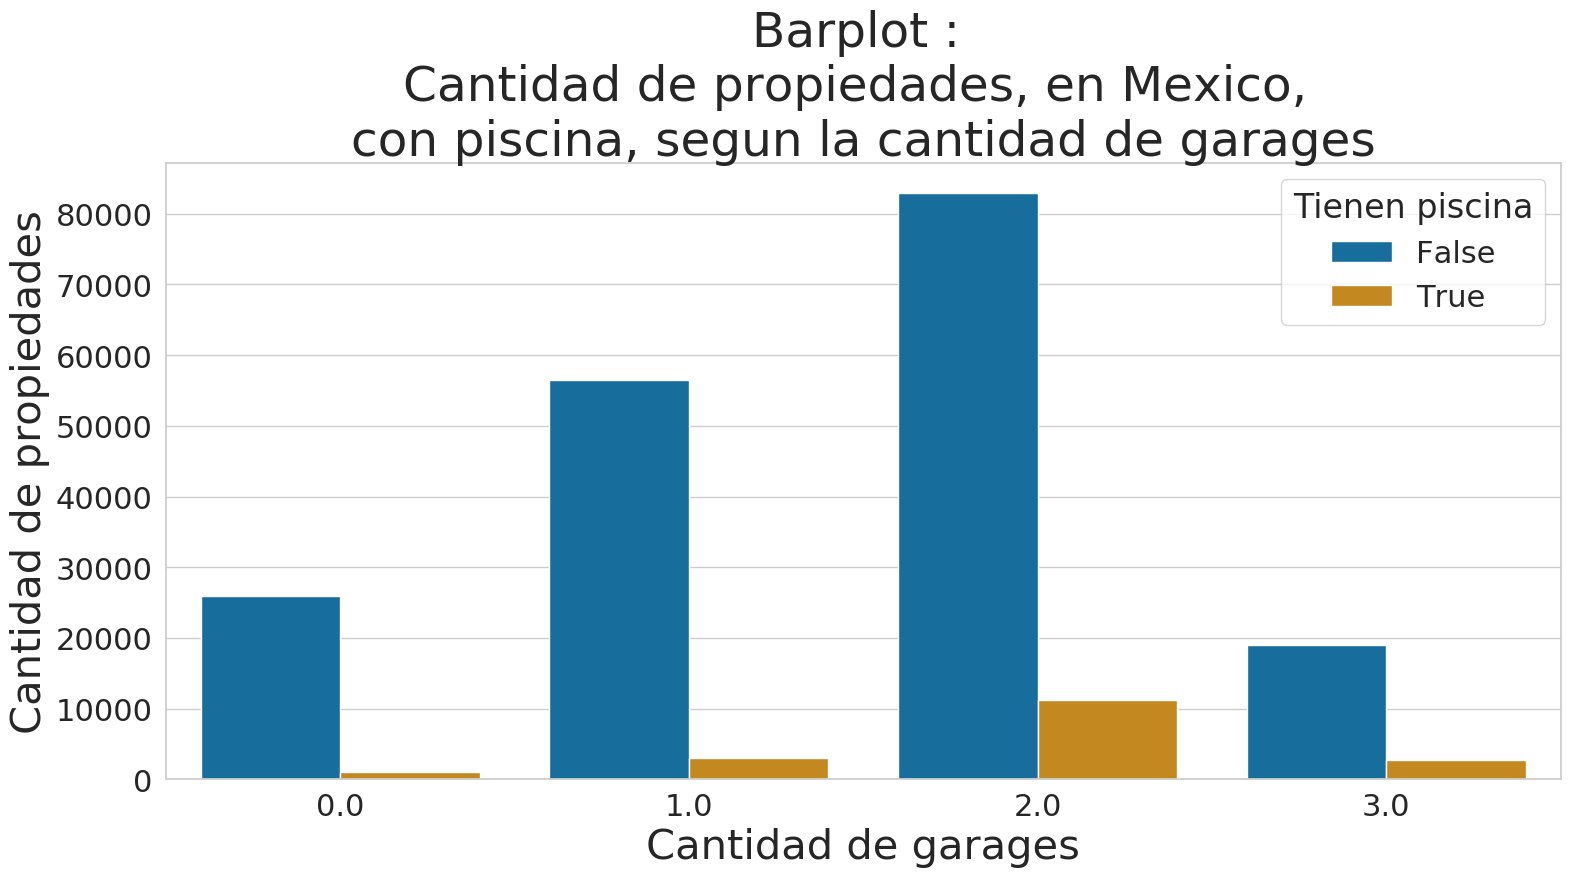

In [201]:
plot_barplot_garages_piscina = sns.barplot(
                                    x = 'garages',
                                    y = 'cantidad_propiedades',
                                    hue = 'tiene_piscina',
                                    data = garages_agrupados_piscina_cantidad
                                )

common.setear_titulos_plot(
    plot_barplot_garages_piscina,
    'Barplot : \nCantidad de propiedades, en Mexico, \ncon piscina, segun la cantidad de garages',
    'Cantidad de garages',
    'Cantidad de propiedades'
)

plot_barplot_garages_piscina.legend(title = 'Tienen piscina')
plt.show()

Tiene forma similar a graficos anteriores, aunque en este caso, parece haber un pequeño aumento de las propiedades que si tienen piscina.  
Tambien podriamos hayar un relacion : gimnasion-usosmultiples-piscina

## Garages-Escuelascercanas

### ¿Cuantos datos perdemos si descartamos garages NaN y garages con escuelasceranas NaN?

In [202]:
zona_garages['escuelascercanas'].isnull().sum()

0

La columna de escuelas cercanas esta limpia; no perdemos mas datos.

### ¿Cuantas propiedades, en Mexico, tienen escuelas cercanas, segun la cantidad de garages?

In [203]:
garages_agrupados_escuelascercanas_cantidad = zona_garages.groupby(['garages']).agg({'escuelascercanas' : 'value_counts'})
garages_agrupados_escuelascercanas_cantidad.columns = ['cantidad_propiedades']
garages_agrupados_escuelascercanas_cantidad = garages_agrupados_escuelascercanas_cantidad.reset_index()
garages_agrupados_escuelascercanas_cantidad.columns = ['garages', 'tiene_escuelascercanas', 'cantidad_propiedades']
garages_agrupados_escuelascercanas_cantidad

,garages,tiene_escuelascercanas,cantidad_propiedades
0,0.00,False,18026
1,0.00,True,8900
2,1.00,False,30738
3,1.00,True,28726
4,2.00,False,48937
5,2.00,True,45230
6,3.00,True,11185
7,3.00,False,10493


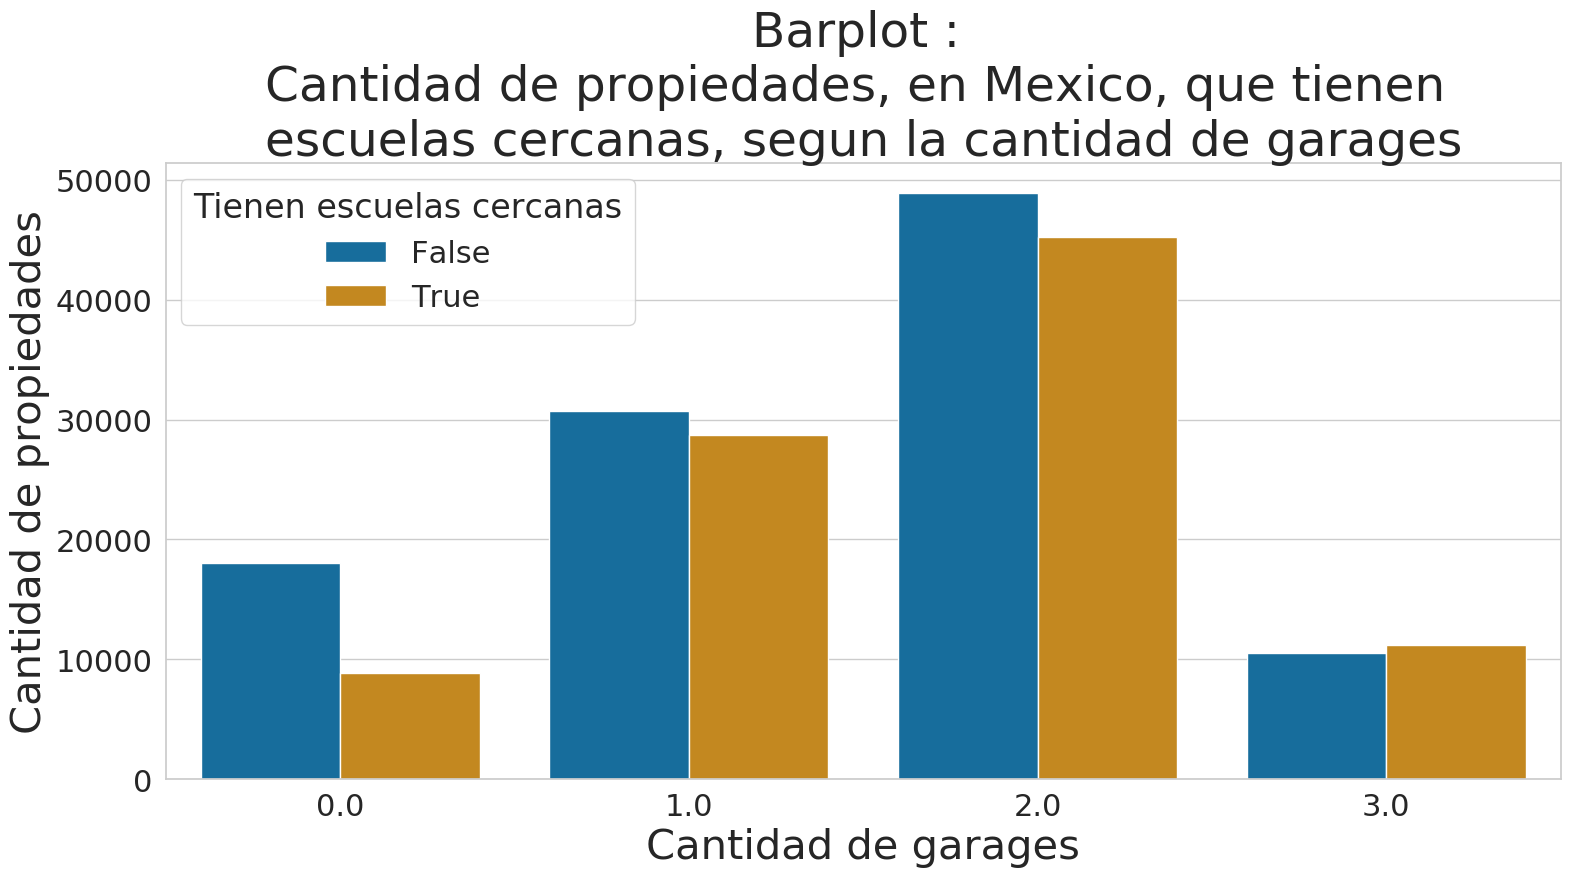

In [204]:
plot_barplot_garages_escuelascercanas = sns.barplot(
                                            x = 'garages',
                                            y = 'cantidad_propiedades',
                                            hue = 'tiene_escuelascercanas',
                                            data = garages_agrupados_escuelascercanas_cantidad
                                        )
# Titulos
common.setear_titulos_plot(
    plot_barplot_garages_escuelascercanas,
    'Barplot : \nCantidad de propiedades, en Mexico, que tienen \nescuelas cercanas, segun la cantidad de garages',
    'Cantidad de garages',
    'Cantidad de propiedades'
)

# Leyenda
plot_barplot_garages_escuelascercanas.legend(title = 'Tienen escuelas cercanas')

plt.show()

En este caso parace haber un equilibrio 50-50 entre las distintas cantidades de garages, y la presencia de escuelas cercanas, exceptuando los 0 garages.  
Aun asi, no podemos argumentar que la cantidad de garages tiene algun tipo de relacion con la presencia de escuelas cercanas, pues, justamente, este fenomeno es el mismo para cada cantidad.

## Garages-Centroscomercialescercanos

### ¿Cuantos datos perdemos si decartamos garages NaN y garages con centroscomercialescercanos NaN?

In [205]:
zona_garages['centroscomercialescercanos'].isnull().sum()

0

La columna de centroscomercialescercanos esta limpiar; no perdemos mas datos.

### ¿Cuantas propiedades, en Mexico, tienen centros comerciales cercanos, segun la cantidad de garages?

In [206]:
garages_agrupados_centroscomercialescercanos_cantidad = zona_garages.groupby(['garages']).agg({'centroscomercialescercanos' : 'value_counts'})
garages_agrupados_centroscomercialescercanos_cantidad.columns = ['cantidad_propiedades']
garages_agrupados_centroscomercialescercanos_cantidad = garages_agrupados_centroscomercialescercanos_cantidad.reset_index()
garages_agrupados_centroscomercialescercanos_cantidad.columns = ['garages', 'tiene_centroscomercialescercanos', 'cantidad_propiedades']
garages_agrupados_centroscomercialescercanos_cantidad

,garages,tiene_centroscomercialescercanos,cantidad_propiedades
0,0.00,False,18720
1,0.00,True,8206
2,1.00,False,32933
3,1.00,True,26531
4,2.00,False,52887
5,2.00,True,41280
6,3.00,False,11410
7,3.00,True,10268


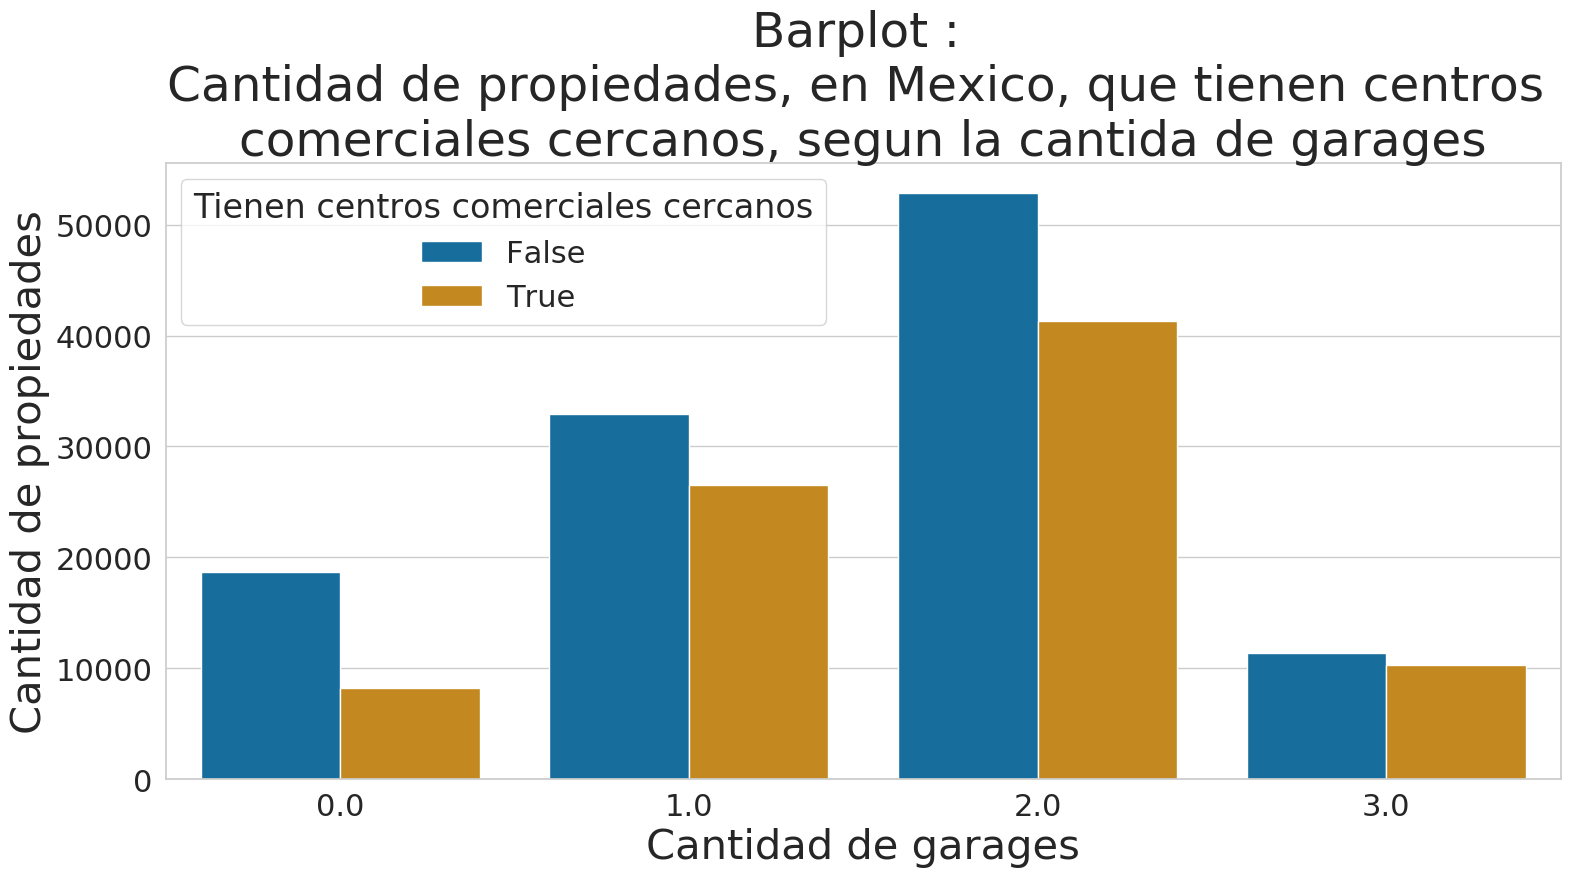

In [207]:
plot_barplot_garages_centroscomercialescercanos = sns.barplot(
                                                    x = 'garages',
                                                    y = 'cantidad_propiedades',
                                                    hue = 'tiene_centroscomercialescercanos',
                                                    data = garages_agrupados_centroscomercialescercanos_cantidad
                                                )
# Titulo
common.setear_titulos_plot(
    plot_barplot_garages_centroscomercialescercanos,
    'Barplot : \nCantidad de propiedades, en Mexico, que tienen centros \ncomerciales cercanos, segun la cantida de garages',
    'Cantidad de garages',
    'Cantidad de propiedades'
)

# Leyenda
plot_barplot_garages_centroscomercialescercanos.legend(title = 'Tienen centros comerciales cercanos')

plt.show()

La relacion de haber o no  haber centros comerciales cercanos parece mantenerse sin variar mucho segun la cantidad de garages.  
El grafico es similar al de garages-escuelascercanas, por lo que tal vez se pueda hallar una relacion alli.  

## Garages-Precio

### ¿Cuantos datos perdemos si descartamos garages NaN y garages con precio NaN?

In [208]:
zona_garages['precio'].isnull().sum()

0

La columna de precio esta limpiar; no perdemos mas datos.

### ¿Como se distribuye el precio de las propiedades, en Mexico, segun la cantidad de garages?

In [209]:
garages_agrupados_precio_estadisticas = zona_garages.groupby(['garages']).agg({'precio' : [common.cuantil_1, 'median', common.cuantil_3]})
garages_agrupados_precio_estadisticas.columns = garages_agrupados_precio_estadisticas.columns.get_level_values(0) \
                                                    + '_' +\
                                                    garages_agrupados_precio_estadisticas.columns.get_level_values(1)
garages_agrupados_precio_estadisticas = garages_agrupados_precio_estadisticas.reset_index()
garages_agrupados_precio_estadisticas

,garages,precio_cuantil_1,precio_median,precio_cuantil_3
0,0.00,"700,000.00","1,300,000.00","2,550,000.00"
1,1.00,"580,000.00","950,000.00","1,650,000.00"
2,2.00,"1,386,532.50","2,200,000.00","3,400,000.00"
3,3.00,"2,500,000.00","3,799,999.50","5,700,000.00"


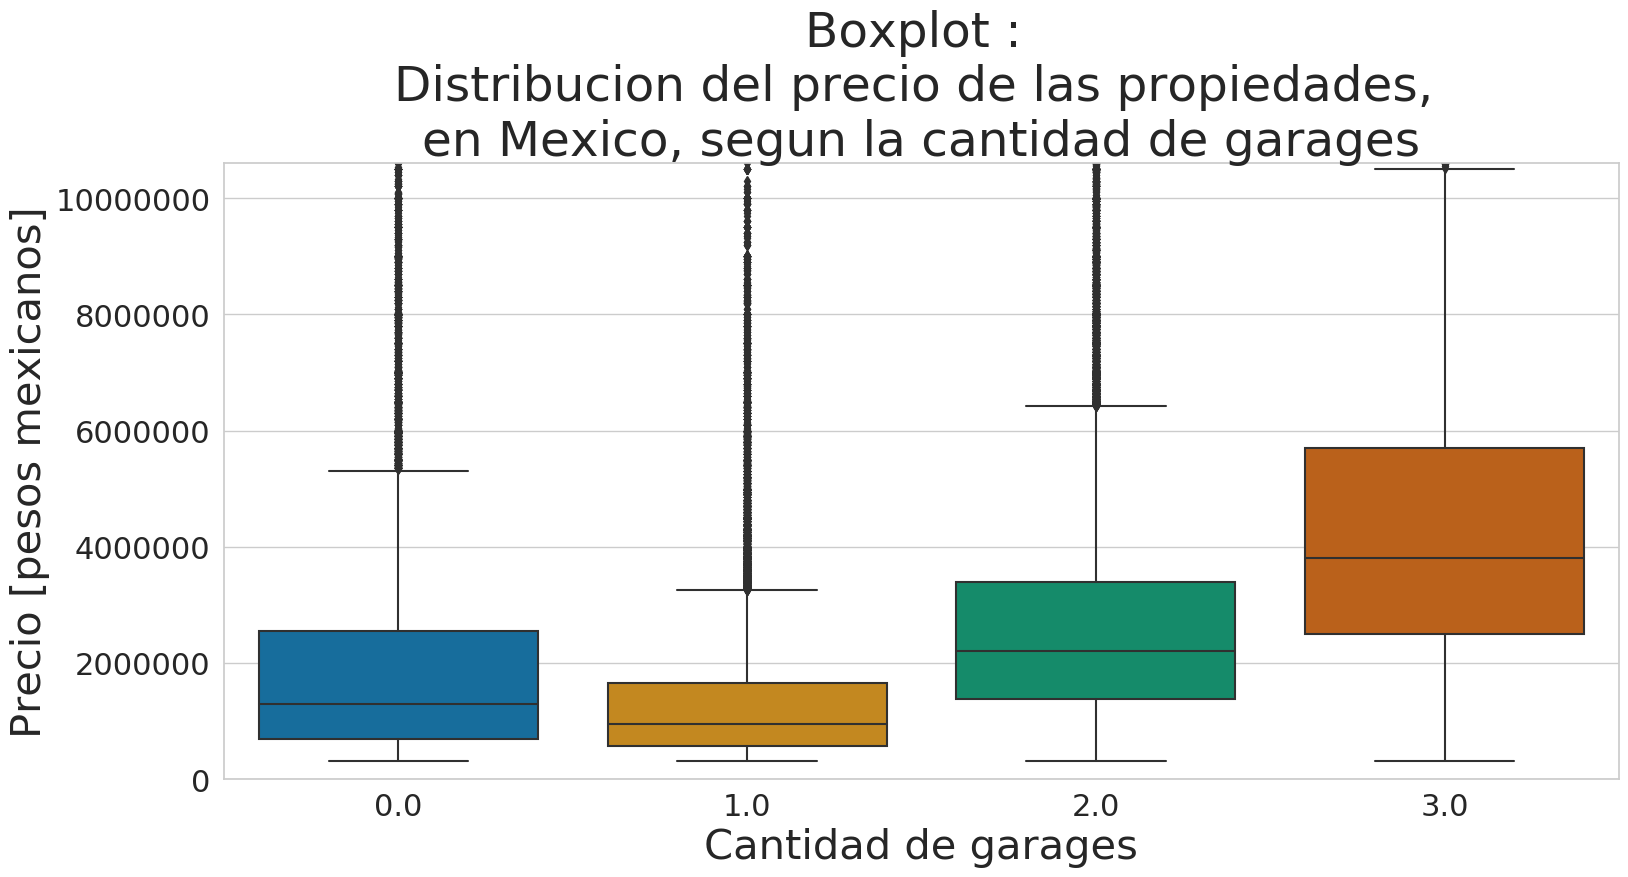

In [210]:
plot_boxplot_garages_precio = sns.boxplot(
                                x = 'garages',
                                y = 'precio',
                                data = zona_garages
                            )
# Titulos
common.setear_titulos_plot(
    plot_boxplot_garages_precio,
    'Boxplot : \nDistribucion del precio de las propiedades, \nen Mexico, segun la cantidad de garages',
    'Cantidad de garages',
    'Precio [pesos mexicanos]'
)

# Elimino notacion cientifica del eje y
plot_boxplot_garages_precio.ticklabel_format(style = 'plain', axis = 'y')

# Seteo limite en el eje y para mejorar visualizacion
plot_boxplot_garages_precio.set_ylim(0,10600000)

plt.show()

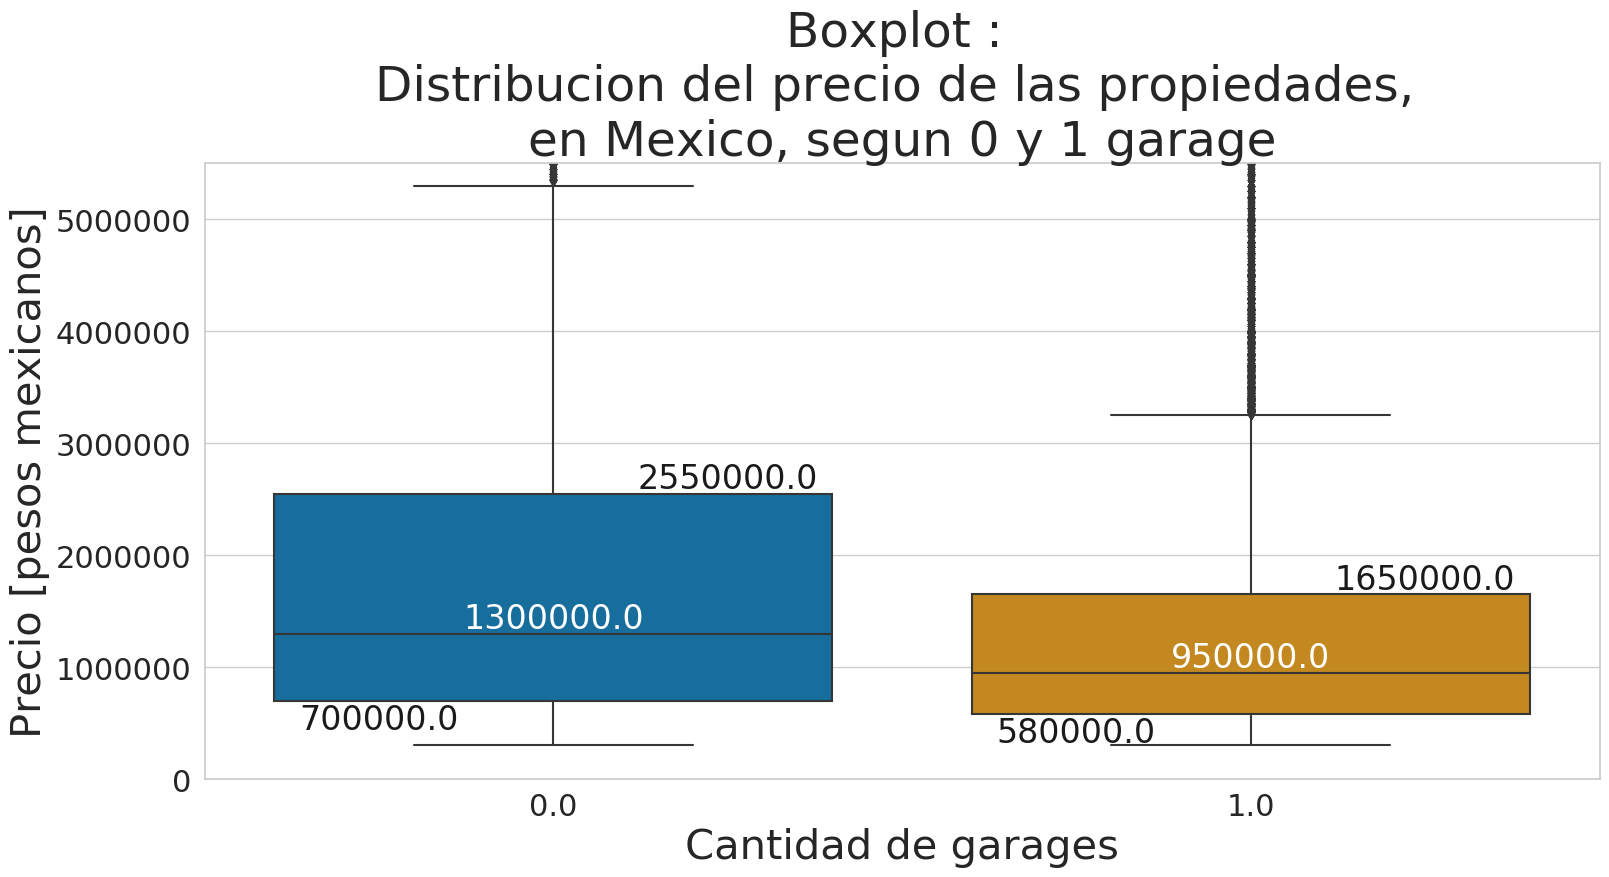

In [211]:
plot_boxplot_garages_0_1_precio = sns.boxplot(
                                x = 'garages',
                                y = 'precio',
                                data = zona_garages.loc[zona_garages['garages'] <= 1]
                            )
# Titulos
common.setear_titulos_plot(
    plot_boxplot_garages_0_1_precio,
    'Boxplot : \nDistribucion del precio de las propiedades, \nen Mexico, segun 0 y 1 garage',
    'Cantidad de garages',
    'Precio [pesos mexicanos]'
)

# Elimino notacion cientifica del eje y
plot_boxplot_garages_0_1_precio.ticklabel_format(style = 'plain', axis = 'y')

# Seteo limite en el eje y para mejorar visualizacion
plot_boxplot_garages_0_1_precio.set_ylim(0,5500000)

# Agrego cuantiles y mediaNA
garages_0_1_agrupados_precio_estadisticas = garages_agrupados_precio_estadisticas.loc[garages_agrupados_precio_estadisticas['garages'] <= 1]
common.agregar_serie_plot(
    plot_boxplot_garages_0_1_precio,
    garages_0_1_agrupados_precio_estadisticas['precio_cuantil_1'],
    garages_0_1_agrupados_precio_estadisticas['precio_cuantil_1'],
    'k',
    -0.25, -250000
)

common.agregar_serie_plot(
    plot_boxplot_garages_0_1_precio,
    garages_0_1_agrupados_precio_estadisticas['precio_median'],
    garages_0_1_agrupados_precio_estadisticas['precio_median'],
    'w',
    0, 50000
)

common.agregar_serie_plot(
    plot_boxplot_garages_0_1_precio,
    garages_0_1_agrupados_precio_estadisticas['precio_cuantil_3'],
    garages_0_1_agrupados_precio_estadisticas['precio_cuantil_3'],
    'k',
    0.25, 50000
)

plt.show()

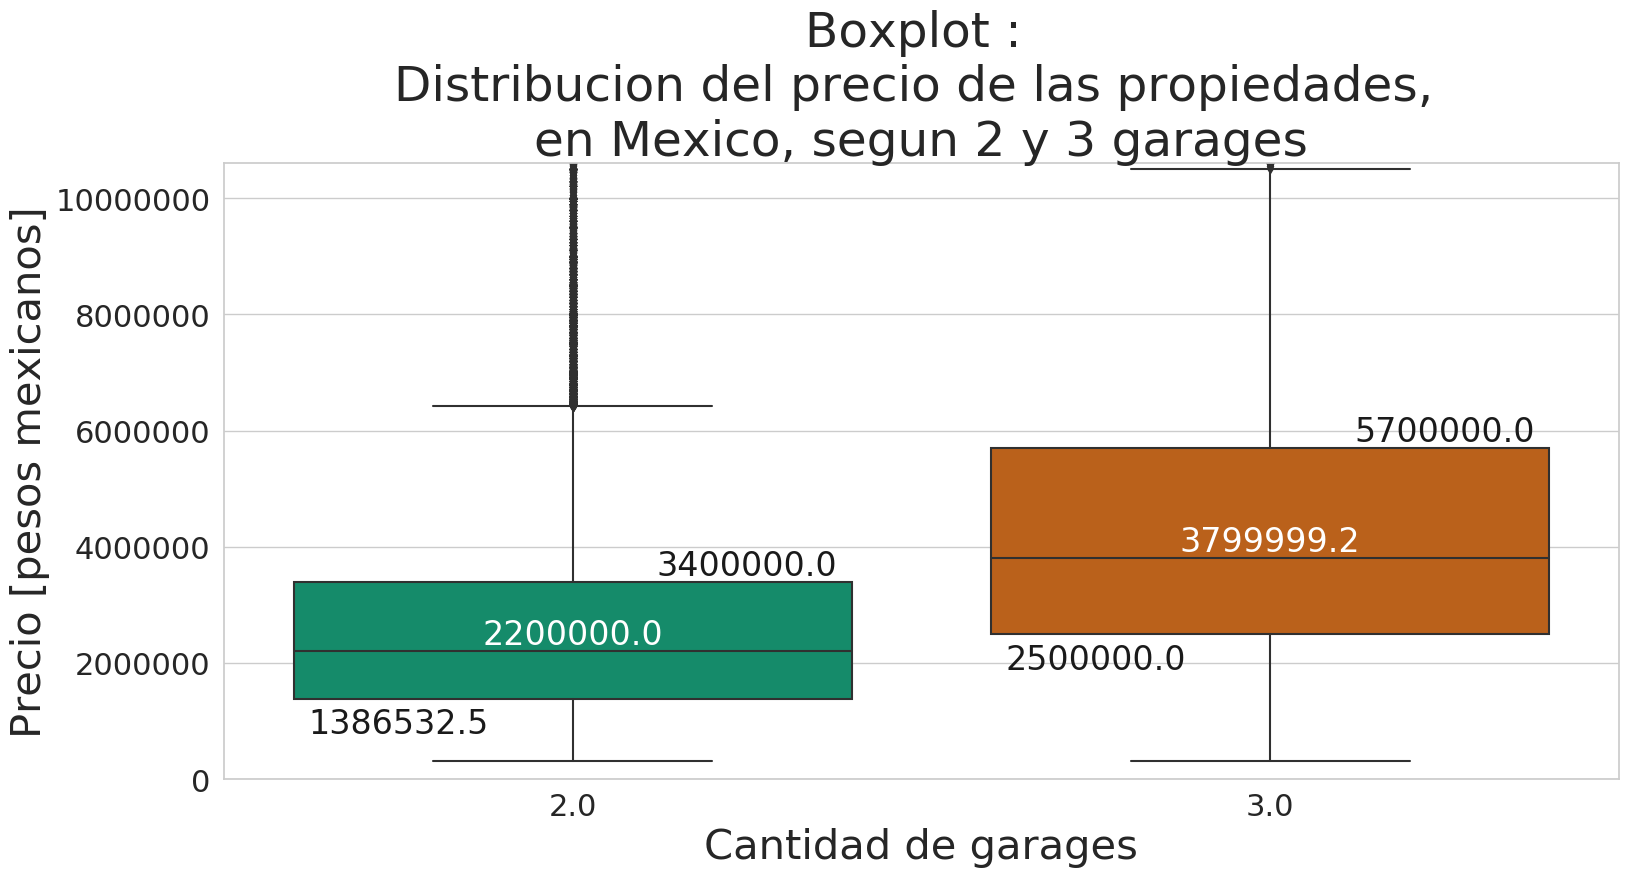

In [212]:
plot_boxplot_garages_2_3_precio = sns.boxplot(
                                x = 'garages',
                                y = 'precio',
                                data = zona_garages.loc[zona_garages['garages'] > 1],
                                palette = sns.color_palette(common.COLORES_BARRAS)[2:4]
                            )
# Titulos
common.setear_titulos_plot(
    plot_boxplot_garages_2_3_precio,
    'Boxplot : \nDistribucion del precio de las propiedades, \nen Mexico, segun 2 y 3 garages',
    'Cantidad de garages',
    'Precio [pesos mexicanos]'
)

# Elimino notacion cientifica del eje y
plot_boxplot_garages_2_3_precio.ticklabel_format(style = 'plain', axis = 'y')

# Seteo limite en el eje y para mejorar visualizacion
plot_boxplot_garages_2_3_precio.set_ylim(0,10600000)

# Marco cuantiles y media
garages_2_3_agrupados_precio_estadisticas = garages_agrupados_precio_estadisticas.loc[garages_agrupados_precio_estadisticas['garages'] > 1]
common.agregar_serie_plot(
    plot_boxplot_garages_2_3_precio,
    garages_2_3_agrupados_precio_estadisticas['precio_cuantil_1'],
    garages_2_3_agrupados_precio_estadisticas['precio_cuantil_1'],
    'k',
    -0.25, -600000
)

common.agregar_serie_plot(
    plot_boxplot_garages_2_3_precio,
    garages_2_3_agrupados_precio_estadisticas['precio_median'],
    garages_2_3_agrupados_precio_estadisticas['precio_median'],
    'w',
    0, 120000
)

common.agregar_serie_plot(
    plot_boxplot_garages_2_3_precio,
    garages_2_3_agrupados_precio_estadisticas['precio_cuantil_3'],
    garages_2_3_agrupados_precio_estadisticas['precio_cuantil_3'],
    'k',
    0.25, 120000
)

plt.show()